# Boston Crime Data Analysis
This project is based on Boston Crime data between 2021-current date downloaded from [this link](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system)

Please answer the following ten questions and visualize each result. Please label each question clearly.

1. display number of crime by year, order by year
2. display number of crime by year and month in the format of year-month, order by year_month.
3. display average crime by month between 2021 and 2024. Visualize your result.
4. display average, min and max crime by month between 2021 and 2024
5. what time of the day has the highest crime
6. display number of crimes by weekday and the time of the day
7. display top 5 district based on number of crimes
8. for each top 5 districts, display top 5 types of crimes (offense_description) based on number of crimes
9. Display percent of shooting by year.
10. Which offenses likely lead to shooting. Show top 5 offense by year.

**Note for the visulaiztion:**

- Select the appropriate chart type for each question to enhance clarity and understanding.
- Use an effective and consistent color scheme to make charts easy to interpret.
- Ensure that the chosen chart types emphasize key insights without overwhelming or confusing the audience.


In addtion, there are many interesting questions you can explore using this dataset. Please come up at least five questions and develop Pyspark code to answer your questions and visualze the result. Please write a few paragraphs at the end to summarize your findings. Your summary should include the above 10 questions and your own questions. Your own questions cannot be an existing question at the above and need to meaningful. You may want to start with developing an objective before developing your questions.

## Import dataset

In [23]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from helper_functions import displayByGroup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# create a spark session
spark = SparkSession.builder.appName("Boston Crime Analysis")\
        .config("spark.port.maxRetries", "100")\
        .getOrCreate()

# confiture the log level (defaulty is WWARN)
spark.sparkContext.setLogLevel('ERROR')

# read the csv file, remove year with null value and remove current month (Septmber 2024)
crime = spark.read.csv("/opt/shared/boston_crime", header=True, inferSchema=True).filter(F.isnull(F.col('year'))==False)\
       .filter(F.date_format(F.col('occurred_on_date'), 'yyyy-MM')!='2024-09')

# change all columns to lower case

crime=crime.toDF(*[x.lower() for x in crime.columns])

In [24]:
crime.printSchema()

root
 |-- incident_number: string (nullable = true)
 |-- offense_code: string (nullable = true)
 |-- offense_code_group: string (nullable = true)
 |-- offense_description: string (nullable = true)
 |-- district: string (nullable = true)
 |-- reporting_area: string (nullable = true)
 |-- shooting: integer (nullable = true)
 |-- occurred_on_date: timestamp (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ucr_part: string (nullable = true)
 |-- street: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- location: string (nullable = true)



In [25]:
displayByGroup(crime, 5)

+---------------+------------+------------------+--------------------+--------+--------------+
|incident_number|offense_code|offense_code_group|offense_description |district|reporting_area|
+---------------+------------+------------------+--------------------+--------+--------------+
|232007173      |3115        |null              |INVESTIGATE PERSON  |B3      |              |
|232004454      |3301        |null              |VERBAL DISPUTE      |B2      |316           |
|232006290      |3115        |null              |INVESTIGATE PERSON  |A1      |              |
|232024939      |3114        |null              |INVESTIGATE PROPERTY|B3      |              |
|232006708      |423         |null              |ASSAULT - AGGRAVATED|B2      |              |
+---------------+------------+------------------+--------------------+--------+--------------+
only showing top 5 rows

+--------+-------------------+----+-----+-----------+----+
|shooting|occurred_on_date   |year|month|day_of_week|hour|
+-

## Example

## Display top five offense

In [26]:
crime.groupBy('offense_description').count().orderBy(F.desc('count')).limit(5).show()

+--------------------+-----+
| offense_description|count|
+--------------------+-----+
|  INVESTIGATE PERSON|27560|
|         SICK ASSIST|21399|
|M/V - LEAVING SCE...|16829|
|INVESTIGATE PROPERTY|12854|
| TOWED MOTOR VEHICLE|12017|
+--------------------+-----+



### Visualize the result

In [13]:
# convert the result to pandas dataframe

pd_df=crime.groupBy('offense_description').count().orderBy(F.desc('count')).limit(5).toPandas()

pd_df.head()

,offense_description,count
0,INVESTIGATE PERSON,27560
1,SICK ASSIST,21399
2,M/V - LEAVING SCENE - PROPERTY DAMAGE,16829
3,INVESTIGATE PROPERTY,12854
4,TOWED MOTOR VEHICLE,12017


<Axes: xlabel='count', ylabel='offense_description'>

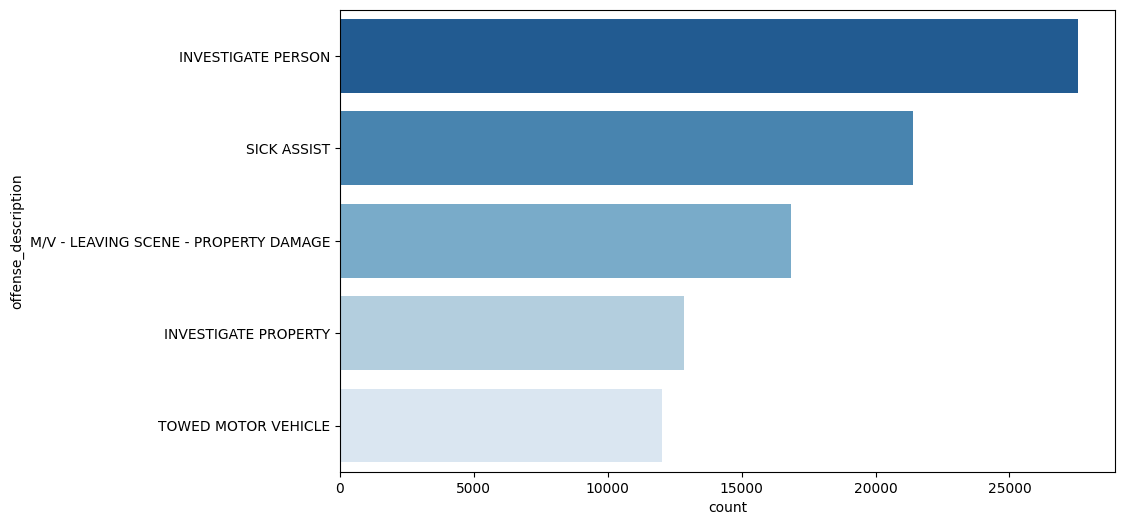

In [14]:
# set the fiture size
plt.figure(figsize=(10,6))

sns.barplot(data=pd_df, y='offense_description',x="count", orient='h', palette='Blues_r')

## Put your solutions in the following section